In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [2]:
#importing Dataset in a Data Frame
DataFrame=pd.read_csv(r"C:\Users\gaura\Downloads\Kaggle Datasets\nyc-rolling-sales.csv") 
DataFrame.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
DataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
DataFrame.describe()


,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [5]:
# checking Duplicates
sum(DataFrame.duplicated(DataFrame.columns))

0

In [6]:
# copying DF and Dropping 'Unnamed: 0'
df=DataFrame.copy()
df.columns
df=df.drop("Unnamed: 0",axis=1)
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
#checking BOROUGH for NUll Values
df['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [8]:
#replacing Borough key with values
df['BOROUGH']=df['BOROUGH'].replace({1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'})
df['BOROUGH'].value_counts()

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: BOROUGH, dtype: int64

In [9]:
# converting Borough from Int64 to category.
df['BOROUGH']=df['BOROUGH'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  object  
 2   BUILDING CLASS CATEGORY         84548 non-null  object  
 3   TAX CLASS AT PRESENT            84548 non-null  object  
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   EASE-MENT                       84548 non-null  object  
 7   BUILDING CLASS AT PRESENT       84548 non-null  object  
 8   ADDRESS                         84548 non-null  object  
 9   APARTMENT NUMBER                84548 non-null  object  
 10  ZIP CODE                        84548 non-null  int64   
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [10]:
#checking distinct values in Neighborhood
df['NEIGHBORHOOD'].value_counts()


FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
BRONX PARK                     1
PELHAM BAY                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [11]:
#converting neighborhood to category
df['NEIGHBORHOOD']=df['NEIGHBORHOOD'].astype('category')

In [12]:
df.nunique(axis=0)

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [13]:
#checking distinct values in Building Class Category
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [14]:
#converting Building Class Category to Category
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].astype('category')


In [15]:
#checking distinct values in Tax Class
df['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [16]:
# replacing subclasses with parent classes
df['TAX CLASS AT PRESENT']=df['TAX CLASS AT PRESENT'].replace({'1A':'Class 1','1C':'Class 1','1B':'Class 1','2A':'Class 2','2C':'Class 2','2B':'Class 2'})
df['TAX CLASS AT PRESENT'].value_counts()
# replacing with class labels
df['TAX CLASS AT PRESENT']=df['TAX CLASS AT PRESENT'].replace({'1':'Class 1','2':'Class 2','3':'Class 3','4':'Class 4'})
df['TAX CLASS AT PRESENT'].value_counts()

Class 1    41497
Class 2    36169
Class 4     6140
             738
Class 3        4
Name: TAX CLASS AT PRESENT, dtype: int64

In [17]:
#counting total blank values
l=[]
for i in range(len(df)):
    if (df['TAX CLASS AT PRESENT'][i]!='Class 1') and (df['TAX CLASS AT PRESENT'][i]!='Class 2') and (df['TAX CLASS AT PRESENT'][i]!='Class 3') and (df['TAX CLASS AT PRESENT'][i]!='Class 4'):
        l.append(df['TAX CLASS AT PRESENT'][i])
    else:
        pass
    
len(l)

738

In [18]:
#making blanks as NAN
df['TAX CLASS AT PRESENT']=df['TAX CLASS AT PRESENT'].replace({" ":np.nan})
df['TAX CLASS AT PRESENT'].isnull().sum()

738

In [19]:
#refilling NAN with backwardfill method
df['TAX CLASS AT PRESENT']=df['TAX CLASS AT PRESENT'].fillna(method='bfill')
df['TAX CLASS AT PRESENT'].value_counts()

Class 1    41527
Class 2    36742
Class 4     6275
Class 3        4
Name: TAX CLASS AT PRESENT, dtype: int64

In [20]:
df['TAX CLASS AT PRESENT']=df['TAX CLASS AT PRESENT'].astype('category')

<AxesSubplot:ylabel='Density'>

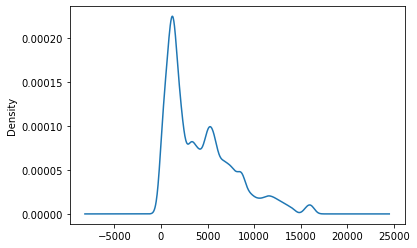

In [21]:
df['BLOCK'].plot(kind='kde')

array([[<AxesSubplot:title={'center':'BLOCK'}>]], dtype=object)

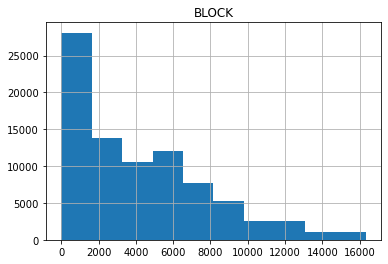

In [22]:
df.hist('BLOCK')

In [23]:
df['BLOCK'].value_counts()


5066     404
16       255
2135     211
4978     187
1171     181
        ... 
9513       1
15658      1
11624      1
9577       1
2047       1
Name: BLOCK, Length: 11566, dtype: int64

1       4125
20       983
12       972
40       935
23       911
        ... 
2097       1
801        1
2848       1
4771       1
3224       1
Name: LOT, Length: 2627, dtype: int64

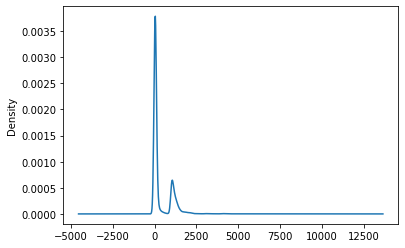

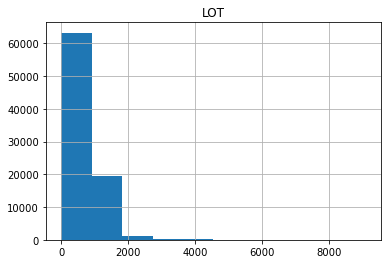

In [24]:
df['LOT'].plot(kind='kde')
df.hist('LOT')
df['LOT'].value_counts()

In [25]:
df['EASE-MENT'].value_counts()

     84548
Name: EASE-MENT, dtype: int64

In [26]:
#dropping Ease-ment as it has zero records and we dont have any relevant information about it.
df=df.drop('EASE-MENT',axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT       84548 non-null  object  
 7   ADDRESS                         84548 non-null  object  
 8   APARTMENT NUMBER                84548 non-null  object  
 9   ZIP CODE                        84548 non-null  int64   
 10  RESIDENTIAL UNITS               84548 non-null  int64   
 11  COMMERCIAL UNITS                84548 non-null  int64   
 12  TOTAL UNITS       

In [28]:
df['BUILDING CLASS AT PRESENT'].value_counts()

D4    12663
R4    12482
A1     6753
A5     5683
B2     4923
      ...  
I3        1
Y1        1
K8        1
Q8        1
Z7        1
Name: BUILDING CLASS AT PRESENT, Length: 167, dtype: int64

In [29]:
df['ADDRESS'].value_counts()

131-05 40TH   ROAD        210
429 KENT AVENUE           158
169 WEST 95TH   STREET    153
131-03 40TH   ROAD        147
265 STATE STREET          127
                         ... 
2323 1 AVENUE               1
1055 EAST 34TH STREET       1
548 KOSCIUSZKO STREET       1
2239 TROY AVENUE, 3K        1
78-19 PITKIN AVENUE         1
Name: ADDRESS, Length: 67563, dtype: int64

In [30]:
# dropping address as we have considered other factors having information about properties location
df=df.drop('ADDRESS',axis=1)

In [31]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [32]:
df['APARTMENT NUMBER'].value_counts()

        65496
4         298
3A        295
3B        275
2         275
        ...  
4040        1
15T         1
PS26        1
14Z1        1
8 N         1
Name: APARTMENT NUMBER, Length: 3989, dtype: int64

In [33]:
# dropping apart number as w have around 65000 null values in this column.
df=df.drop('APARTMENT NUMBER',axis=1)

<AxesSubplot:ylabel='Density'>

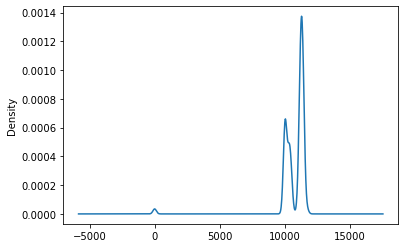

In [34]:
df['ZIP CODE'].plot(kind='kde')

array([[<AxesSubplot:title={'center':'RESIDENTIAL UNITS'}>]], dtype=object)

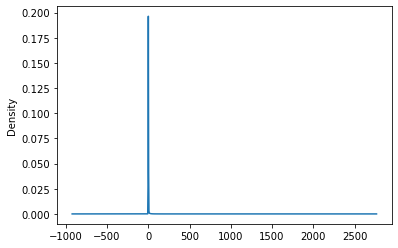

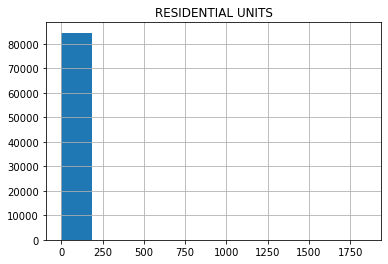

In [35]:
df['RESIDENTIAL UNITS'].plot(kind='kde')
df.hist('RESIDENTIAL UNITS')


0       79429
1        3558
2         817
3         259
4         137
5          74
6          70
7          31
8          26
9          20
10         17
12         12
15         11
11         10
14          6
17          6
13          4
20          4
254         4
35          4
19          3
42          3
18          3
22          3
126         2
436         2
26          2
422         2
16          2
25          2
56          1
184         1
59          1
55          1
52          1
51          1
49          1
172         1
62          1
23          1
38          1
34          1
32          1
31          1
30          1
28          1
91          1
27          1
24          1
21          1
2261        1
147         1
73          1
67          1
318         1
Name: COMMERCIAL UNITS, dtype: int64

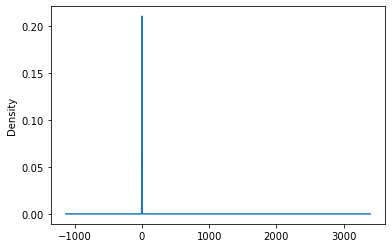

In [36]:
df['COMMERCIAL UNITS'].plot(kind='kde')
df['COMMERCIAL UNITS'].value_counts()

<AxesSubplot:ylabel='Density'>

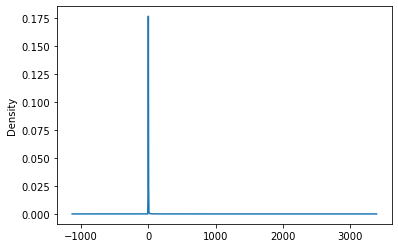

In [37]:
df['TOTAL UNITS'].plot(kind='kde')

In [38]:
df['LAND SQUARE FEET'].value_counts()

 -       26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
5233         1
15085        1
2699         1
18492        1
42762        1
Name: LAND SQUARE FEET, Length: 6062, dtype: int64

In [39]:
for i in range(len(df)):
    if df['LAND SQUARE FEET'][i]==' -  ':
        df['LAND SQUARE FEET'][i]=np.nan
    else:
        pass
df['LAND SQUARE FEET'].value_counts()

<ipython-input-39-2f91dab132fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAND SQUARE FEET'][i]=np.nan


0        10326
2000      3919
2500      3470
4000      3044
1800      1192
         ...  
5233         1
15085        1
18492        1
2699         1
4302         1
Name: LAND SQUARE FEET, Length: 6061, dtype: int64

In [40]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].astype('float64')
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['LAND SQUARE FEET'].value_counts()

3941.675775     26252
0.000000        10326
2000.000000      3919
2500.000000      3470
4000.000000      3044
                ...  
7047.000000         1
24056.000000        1
7067.000000         1
1532.000000         1
11236.000000        1
Name: LAND SQUARE FEET, Length: 6062, dtype: int64

In [41]:
df['GROSS SQUARE FEET'].value_counts()
for i in range(len(df)):
    if df['GROSS SQUARE FEET'][i]==' -  ':
        df['GROSS SQUARE FEET'][i]=np.nan
    else:
        pass
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].astype('float64')
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())
df['GROSS SQUARE FEET'].value_counts()

<ipython-input-41-0b3f2045db35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GROSS SQUARE FEET'][i]=np.nan


4045.707479     27612
0.000000        11417
2400.000000       386
1800.000000       361
2000.000000       359
                ...  
2623.000000         1
3275.000000         1
3459.000000         1
5033.000000         1
18750.000000        1
Name: GROSS SQUARE FEET, Length: 5691, dtype: int64

In [42]:
df['YEAR BUILT'].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
        ... 
1826       1
1829       1
1855       1
1832       1
1849       1
Name: YEAR BUILT, Length: 158, dtype: int64

In [43]:
    # fillig all the records having year built '0' using backwad fill method.
    df['YEAR BUILT']=df['YEAR BUILT'].astype('object')
    df['YEAR BUILT']=df['YEAR BUILT'].replace({0:np.nan})
    df['YEAR BUILT']=df['YEAR BUILT'].fillna(method='bfill')
    df['YEAR BUILT'].value_counts()

1920.0    6353
1930.0    5290
1925.0    4437
1910.0    3809
1950.0    3524
          ... 
1888.0       1
1826.0       1
1829.0       1
1855.0       1
1849.0       1
Name: YEAR BUILT, Length: 157, dtype: int64

In [44]:
df['YEAR BUILT']=df['YEAR BUILT'].astype('int64')
df['YEAR BUILT'].value_counts()

1920    6353
1930    5290
1925    4437
1910    3809
1950    3524
        ... 
1829       1
1111       1
1680       1
1849       1
1888       1
Name: YEAR BUILT, Length: 157, dtype: int64

In [45]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [46]:
df['TAX CLASS AT TIME OF SALE']=df['TAX CLASS AT TIME OF SALE'].replace({1:'Class 1',2:'Class 2',3:'Class 3',4:'Class 4'})
df['TAX CLASS AT TIME OF SALE'].value_counts()

Class 1    41533
Class 2    36726
Class 4     6285
Class 3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [47]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
R7        1
K8        1
Y3        1
CM        1
HH        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 166, dtype: int64

In [48]:
df['SALE PRICE'].value_counts()

 -          14561
0           10228
10            766
450000        427
550000        416
            ...  
417768          1
20800000        1
2690374         1
1867625         1
633500          1
Name: SALE PRICE, Length: 10008, dtype: int64

In [49]:
for i in range(len(df)):
    if df['SALE PRICE'][i]==' -  ':
        df['SALE PRICE'][i]=np.nan
    else:
        pass

<ipython-input-49-f05e18815468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE'][i]=np.nan


In [50]:
df['SALE PRICE']=df['SALE PRICE'].astype('float')

In [51]:
df['SALE DATE']=df['SALE DATE'].astype('datetime64[ns]')

In [52]:
df['SALE DATE'].value_counts()

2017-06-29    544
2017-06-15    530
2016-12-22    527
2017-05-25    511
2016-10-06    508
             ... 
2016-11-27      2
2017-07-09      2
2017-01-08      2
2017-08-13      1
2017-06-04      1
Name: SALE DATE, Length: 364, dtype: int64

In [53]:
df['SALE YEAR']=pd.DatetimeIndex(df['SALE DATE']).year
df['SALE MONTH']=pd.DatetimeIndex(df['SALE DATE']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ZIP CODE                        84548 non-null  int64         
 8   RESIDENTIAL UNITS               84548 non-null  int64         
 9   COMMERCIAL UNITS                84548 non-null  int64         
 10  TOTAL UNITS                     84548 non-null  int64         
 11  LA

In [54]:
df=df.drop('SALE DATE',axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT       84548 non-null  object  
 7   ZIP CODE                        84548 non-null  int64   
 8   RESIDENTIAL UNITS               84548 non-null  int64   
 9   COMMERCIAL UNITS                84548 non-null  int64   
 10  TOTAL UNITS                     84548 non-null  int64   
 11  LAND SQUARE FEET                84548 non-null  float64 
 12  GROSS SQUARE FEET 

In [56]:
df['SALE YEAR']=df['SALE YEAR'].astype('object')
df['SALE MONTH']=df['SALE MONTH'].astype('object')

<AxesSubplot:>

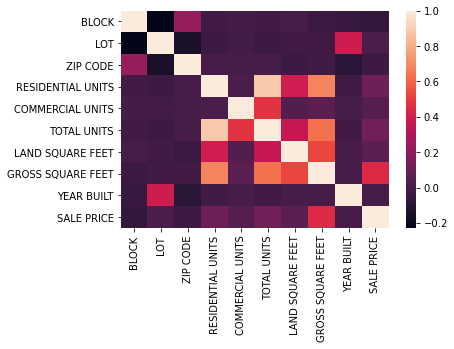

In [57]:
#plotting heatmap of all the continuous variables to understand the correlation with Sale Price.
cor=df.corr()
sb.heatmap(cor)

In [58]:
cor['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.444508
TOTAL UNITS          0.125101
RESIDENTIAL UNITS    0.119698
LAND SQUARE FEET     0.059079
COMMERCIAL UNITS     0.046006
LOT                  0.012324
YEAR BUILT           0.005189
ZIP CODE            -0.034170
BLOCK               -0.061139
Name: SALE PRICE, dtype: float64

Gross Square Feet has the highest correlation with Sale Price

In [59]:
#separating records having SALE PRICE as null
test=df[df['SALE PRICE'].isna()]
data=df[~df['SALE PRICE'].isna()]

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14561 entries, 1 to 84542
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         14561 non-null  category
 1   NEIGHBORHOOD                    14561 non-null  category
 2   BUILDING CLASS CATEGORY         14561 non-null  category
 3   TAX CLASS AT PRESENT            14561 non-null  category
 4   BLOCK                           14561 non-null  int64   
 5   LOT                             14561 non-null  int64   
 6   BUILDING CLASS AT PRESENT       14561 non-null  object  
 7   ZIP CODE                        14561 non-null  int64   
 8   RESIDENTIAL UNITS               14561 non-null  int64   
 9   COMMERCIAL UNITS                14561 non-null  int64   
 10  TOTAL UNITS                     14561 non-null  int64   
 11  LAND SQUARE FEET                14561 non-null  float64 
 12  GROSS SQUARE FEET 

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         69987 non-null  category
 1   NEIGHBORHOOD                    69987 non-null  category
 2   BUILDING CLASS CATEGORY         69987 non-null  category
 3   TAX CLASS AT PRESENT            69987 non-null  category
 4   BLOCK                           69987 non-null  int64   
 5   LOT                             69987 non-null  int64   
 6   BUILDING CLASS AT PRESENT       69987 non-null  object  
 7   ZIP CODE                        69987 non-null  int64   
 8   RESIDENTIAL UNITS               69987 non-null  int64   
 9   COMMERCIAL UNITS                69987 non-null  int64   
 10  TOTAL UNITS                     69987 non-null  int64   
 11  LAND SQUARE FEET                69987 non-null  float64 
 12  GROSS SQUARE FEET 

In [62]:
test = test.drop(columns='SALE PRICE')


In [63]:
# Print first 5 rows of test
print(test.shape)
test.head()

(14561, 18)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE YEAR,SALE MONTH
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,399,26,C7,10009,28,3,31,4616.0,18690.0,1900,Class 2,C7,2016,12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,399,39,C7,10009,16,1,17,2212.0,7803.0,1900,Class 2,C7,2016,12
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,405,16,C4,10009,20,0,20,2581.0,9730.0,1900,Class 2,C4,2017,7
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,407,18,C7,10009,44,2,46,5163.0,21007.0,1900,Class 2,C7,2017,7
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,Class 2,379,34,D5,10009,15,0,15,1534.0,9198.0,1920,Class 2,D5,2017,6


In [64]:
#Printing first rows of our data
print(data.shape)
data.head(10)

(69987, 19)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,392,6,C2,10009,5,0,5,1633.000000,6440.000000,1900,Class 2,C2,6625000.0,2017,7
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,402,21,C4,10009,10,0,10,2272.000000,6794.000000,1913,Class 2,C4,3936272.0,2016,9
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,404,55,C2,10009,6,0,6,2369.000000,4615.000000,1900,Class 2,C2,8000000.0,2016,11
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,406,32,C4,10009,8,0,8,1750.000000,4226.000000,1920,Class 2,C4,3192840.0,2016,9
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,Class 2,387,153,D9,10009,24,0,24,4489.000000,18523.000000,1920,Class 2,D9,16232000.0,2016,11
11,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,Class 2,400,21,D1,10009,10,0,10,3717.000000,12350.000000,2009,Class 2,D1,10350000.0,2016,10
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,373,40,C6,10009,0,0,0,3941.675775,4045.707479,1920,Class 2,C6,1.0,2016,9
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,373,40,C6,10009,0,0,0,3941.675775,4045.707479,1920,Class 2,C6,499000.0,2017,3
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,373,40,C6,10009,0,0,0,3941.675775,4045.707479,1920,Class 2,C6,10.0,2017,4
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,373,40,C6,10009,0,0,0,3941.675775,4045.707479,1920,Class 2,C6,529500.0,2017,6


In [65]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,6.998700e+04,6.998700e+04,69987.000000,6.998700e+04
mean,4196.072528,373.828397,10741.455185,1.899553,0.172489,2.092203,3.723936e+03,3.788460e+03,1950.743738,1.276456e+06
std,3429.196524,656.096528,1263.234938,14.549545,9.123717,17.276100,3.369980e+04,2.447372e+04,35.361297,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1111.000000,0.000000e+00
25%,1348.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.268000e+03,1925.000000,2.250000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.946000e+03,2.400000e+03,1945.000000,5.300000e+05
75%,6186.000000,709.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1975.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


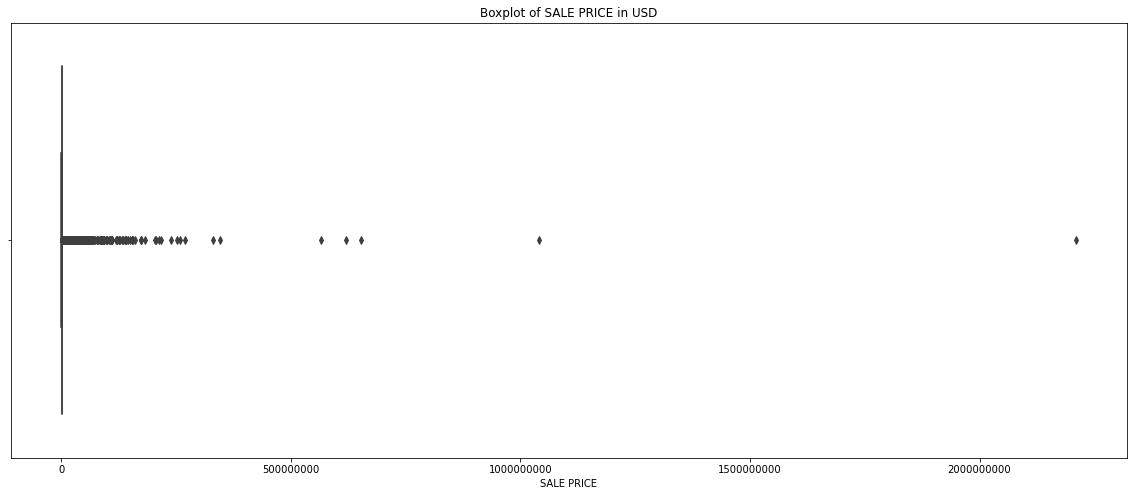

In [66]:
plt.figure(figsize=(20,8))

sb.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'SALE PRICE'}>]], dtype=object)

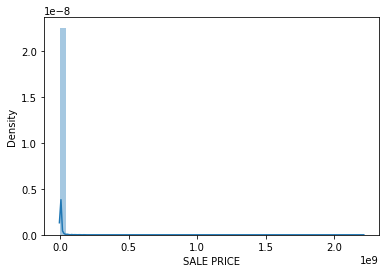

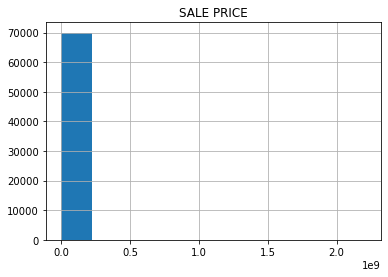

In [67]:
sb.distplot(data['SALE PRICE'])
data.hist('SALE PRICE')

In [68]:
data['SALE PRICE'].skew()


124.09425128278801

as we can see data is heavily skewed because of outliers hence we are removing outliers.

data=data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

In [69]:
data=data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54657 entries, 3 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         54657 non-null  category
 1   NEIGHBORHOOD                    54657 non-null  category
 2   BUILDING CLASS CATEGORY         54657 non-null  category
 3   TAX CLASS AT PRESENT            54657 non-null  category
 4   BLOCK                           54657 non-null  int64   
 5   LOT                             54657 non-null  int64   
 6   BUILDING CLASS AT PRESENT       54657 non-null  object  
 7   ZIP CODE                        54657 non-null  int64   
 8   RESIDENTIAL UNITS               54657 non-null  int64   
 9   COMMERCIAL UNITS                54657 non-null  int64   
 10  TOTAL UNITS                     54657 non-null  int64   
 11  LAND SQUARE FEET                54657 non-null  float64 
 12  GROSS SQUARE FEET 

In [71]:
data['SALE PRICE'].skew()

2.3446374221747437

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

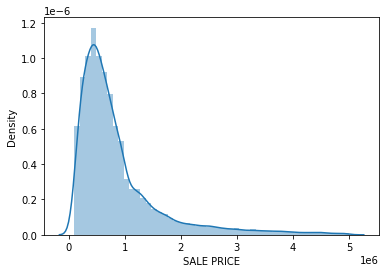

In [72]:
sb.distplot(data['SALE PRICE'])

<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

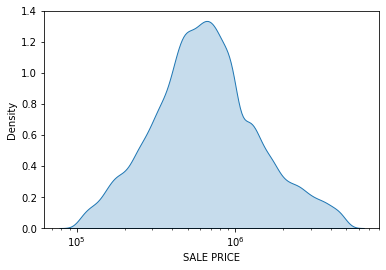

In [73]:
sb.kdeplot(data=data, x="SALE PRICE", log_scale=True,fill=True)

<AxesSubplot:xlabel='GROSS SQUARE FEET'>

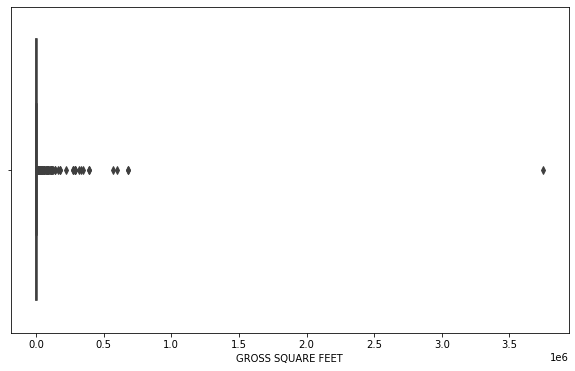

In [74]:
plt.figure(figsize=(10,6))
sb.boxplot(x='GROSS SQUARE FEET', data=data,showfliers=True)

<AxesSubplot:xlabel='LAND SQUARE FEET'>

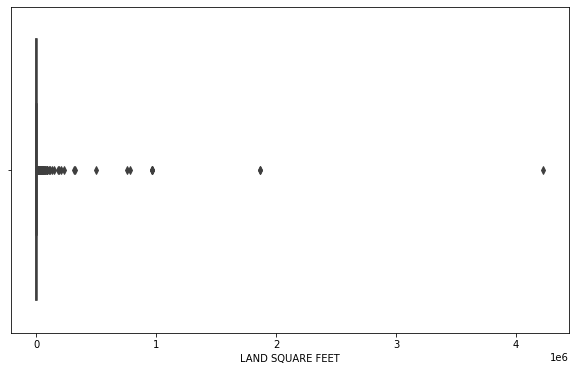

In [75]:
plt.figure(figsize=(10,6))
sb.boxplot(x='LAND SQUARE FEET', data=data,showfliers=True)

In [76]:
data['GROSS SQUARE FEET'].value_counts()

4045.707479    19892
0.000000        7966
1800.000000      236
1600.000000      232
1440.000000      232
               ...  
9240.000000        1
5957.000000        1
5640.000000        1
8800.000000        1
6704.000000        1
Name: GROSS SQUARE FEET, Length: 3645, dtype: int64

In [77]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 3 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         53920 non-null  category
 1   NEIGHBORHOOD                    53920 non-null  category
 2   BUILDING CLASS CATEGORY         53920 non-null  category
 3   TAX CLASS AT PRESENT            53920 non-null  category
 4   BLOCK                           53920 non-null  int64   
 5   LOT                             53920 non-null  int64   
 6   BUILDING CLASS AT PRESENT       53920 non-null  object  
 7   ZIP CODE                        53920 non-null  int64   
 8   RESIDENTIAL UNITS               53920 non-null  int64   
 9   COMMERCIAL UNITS                53920 non-null  int64   
 10  TOTAL UNITS                     53920 non-null  int64   
 11  LAND SQUARE FEET                53920 non-null  float64 
 12  GROSS SQUARE FEET 

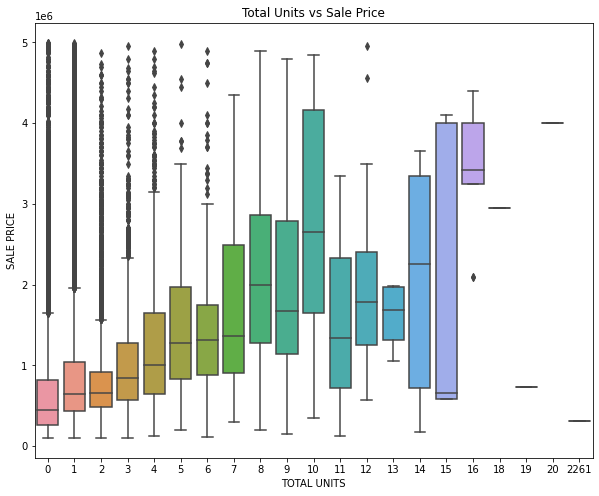

In [78]:
plt.figure(figsize=(10,8))
sb.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data)
plt.title('Total Units vs Sale Price')
plt.show()

In [79]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [80]:
data.corr()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.000000,-0.239443,0.279901,0.106360,0.007212,0.019277,-0.016990,-0.277380,-0.071998,-0.329976
LOT,-0.239443,1.000000,-0.164170,-0.095115,-0.004353,-0.014540,-0.063169,0.072008,0.397129,0.210096
ZIP CODE,0.279901,-0.164170,1.000000,0.158916,0.003646,0.022295,-0.127876,-0.160108,-0.113800,-0.157944
RESIDENTIAL UNITS,0.106360,-0.095115,0.158916,1.000000,-0.002093,0.114568,-0.079164,0.042333,-0.127238,0.151180
COMMERCIAL UNITS,0.007212,-0.004353,0.003646,-0.002093,1.000000,0.993126,0.000590,0.009045,-0.006119,0.000403
TOTAL UNITS,0.019277,-0.014540,0.022295,0.114568,0.993126,1.000000,-0.008740,0.014153,-0.020447,0.018592
LAND SQUARE FEET,-0.016990,-0.063169,-0.127876,-0.079164,0.000590,-0.008740,1.000000,0.664700,-0.045750,0.090386
GROSS SQUARE FEET,-0.277380,0.072008,-0.160108,0.042333,0.009045,0.014153,0.664700,1.000000,0.004894,0.249645
YEAR BUILT,-0.071998,0.397129,-0.113800,-0.127238,-0.006119,-0.020447,-0.045750,0.004894,1.000000,0.030090
SALE PRICE,-0.329976,0.210096,-0.157944,0.151180,0.000403,0.018592,0.090386,0.249645,0.030090,1.000000


In [81]:
#dropping Residential and commercial units as total units is sum of both
data=data.drop(columns='RESIDENTIAL UNITS')

In [82]:
data=data.drop(columns='COMMERCIAL UNITS')

In [86]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'YEAR BUILT', 'SALE PRICE'],
      dtype='object')

In [87]:
data.corr()

,BLOCK,LOT,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.000000,-0.239443,0.279901,0.019277,-0.016990,-0.071998,-0.329976
LOT,-0.239443,1.000000,-0.164170,-0.014540,-0.063169,0.397129,0.210096
ZIP CODE,0.279901,-0.164170,1.000000,0.022295,-0.127876,-0.113800,-0.157944
TOTAL UNITS,0.019277,-0.014540,0.022295,1.000000,-0.008740,-0.020447,0.018592
LAND SQUARE FEET,-0.016990,-0.063169,-0.127876,-0.008740,1.000000,-0.045750,0.090386
YEAR BUILT,-0.071998,0.397129,-0.113800,-0.020447,-0.045750,1.000000,0.030090
SALE PRICE,-0.329976,0.210096,-0.157944,0.018592,0.090386,0.030090,1.000000


In [83]:
#dropping Gross Square feet as Land Square feet would give precise results
data=data.drop(columns='GROSS SQUARE FEET')

In [88]:
#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [89]:
data[skewed].head()

,BLOCK,LOT,TOTAL UNITS,SALE PRICE
3,5.998937,3.091042,2.397895,15.185745
6,6.008813,3.496508,2.197225,14.976422
13,5.924256,3.713572,0.000000,13.120363
15,5.924256,3.713572,0.000000,13.179690
16,5.924256,3.713572,0.000000,12.955130


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

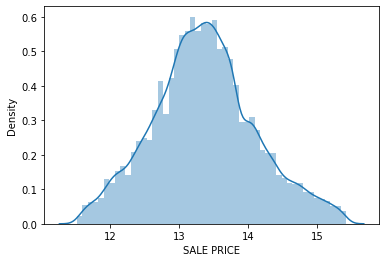

In [90]:
sb.distplot(data['SALE PRICE'])

In [91]:
scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       data[col] = scaled[:,i]

In [92]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,-1.529970,-0.637287,C4,-0.638097,3.669621,-0.378911,-1.136035,Class 2,C4,2.430173,2016,9
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,Class 2,-1.521843,-0.430541,C4,-0.638097,3.252003,-0.705663,-0.932581,Class 2,C4,2.150482,2016,9
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,-1.591420,-0.319861,C6,-0.638097,-1.320667,0.666241,-0.932581,Class 2,C6,-0.329516,2017,3
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,-1.591420,-0.319861,C6,-0.638097,-1.320667,0.666241,-0.932581,Class 2,C6,-0.250245,2017,6
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,Class 2,-1.591420,-0.319861,C6,-0.638097,-1.320667,0.666241,-0.932581,Class 2,C6,-0.550295,2017,7


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 3 to 84545
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         53920 non-null  category
 1   NEIGHBORHOOD                    53920 non-null  category
 2   BUILDING CLASS CATEGORY         53920 non-null  category
 3   TAX CLASS AT PRESENT            53920 non-null  category
 4   BLOCK                           53920 non-null  float64 
 5   LOT                             53920 non-null  float64 
 6   BUILDING CLASS AT PRESENT       53920 non-null  object  
 7   ZIP CODE                        53920 non-null  float64 
 8   TOTAL UNITS                     53920 non-null  float64 
 9   LAND SQUARE FEET                53920 non-null  float64 
 10  YEAR BUILT                      53920 non-null  float64 
 11  TAX CLASS AT TIME OF SALE       53920 non-null  object  
 12  BUILDING CLASS AT 

In [94]:
data = data.drop(columns='BUILDING CLASS AT PRESENT')
data = data.drop(columns='BUILDING CLASS AT TIME OF SALE')
data = data.drop(columns='NEIGHBORHOOD')


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 3 to 84545
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    53920 non-null  category
 1   BUILDING CLASS CATEGORY    53920 non-null  category
 2   TAX CLASS AT PRESENT       53920 non-null  category
 3   BLOCK                      53920 non-null  float64 
 4   LOT                        53920 non-null  float64 
 5   ZIP CODE                   53920 non-null  float64 
 6   TOTAL UNITS                53920 non-null  float64 
 7   LAND SQUARE FEET           53920 non-null  float64 
 8   YEAR BUILT                 53920 non-null  float64 
 9   TAX CLASS AT TIME OF SALE  53920 non-null  object  
 10  SALE PRICE                 53920 non-null  float64 
 11  SALE YEAR                  53920 non-null  object  
 12  SALE MONTH                 53920 non-null  object  
dtypes: category(3), float64(7), obj

In [96]:
data = data.drop(columns='TAX CLASS AT PRESENT')

In [97]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE']

In [98]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 3 to 84545
Data columns (total 55 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   BOROUGH_Bronx                                                         53920 non-null  uint8
 1   BOROUGH_Brooklyn                                                      53920 non-null  uint8
 2   BOROUGH_Manhattan                                                     53920 non-null  uint8
 3   BOROUGH_Queens                                                        53920 non-null  uint8
 4   BOROUGH_Staten Island                                                 53920 non-null  uint8
 5   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                       53920 non-null  uint8
 6   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                       53920 non-null  uint8
 7   BUILDING CLAS

<ipython-input-98-51f105c0d9b3>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)


In [99]:
# Replacing categorical columns with dummies
FinalData = data.drop(one_hot_features,axis=1)
FinalData = pd.concat([FinalData, one_hot_encoded] ,axis=1)

In [100]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 3 to 84545
Data columns (total 64 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   BLOCK                                                                 53920 non-null  float64
 1   LOT                                                                   53920 non-null  float64
 2   ZIP CODE                                                              53920 non-null  float64
 3   TOTAL UNITS                                                           53920 non-null  float64
 4   LAND SQUARE FEET                                                      53920 non-null  float64
 5   YEAR BUILT                                                            53920 non-null  float64
 6   SALE PRICE                                                            53920 non-null  float64


Splitting Data for Training and Testing

In [101]:
Y_FinalData = FinalData['SALE PRICE']
X_FinalData = FinalData.drop('SALE PRICE', axis=1)

X_FinalData.shape , Y_FinalData.shape

((53920, 63), (53920,))

In [102]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_FinalData , Y_FinalData , test_size = 0.2 , random_state =34)

In [103]:
# Training set
X_train.shape , Y_train.shape

((43136, 63), (43136,))

In [104]:
# Testing set
X_test.shape , Y_test.shape

((10784, 63), (10784,))

In [105]:
# Root Mean Square Error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [106]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)


LinearRegression()

In [107]:
linreg.score(X_train, Y_train)

0.48109610743024456

In [108]:
Y_pred_lin = linreg.predict(X_test)
rmse(Y_test,Y_pred_lin)

0.720135608006096

In [109]:
#Lasso Regression with aplha = 0.00099 and maximum iteration of 5000
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
rmse(Y_test,Y_pred_lasso)

0.7234092312067316

In [110]:
#Ridge Regression with alpha=0.01 & normalize=True
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
rmse(Y_test,Y_pred_ridge)

0.7203165463316301

In [111]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse(Y_test,Y_pred_rf)

0.5469293975154836

Comparing Root Mean Square Error of all the models Random Forest classifier is the best fit with RMSE = 0.54

